In [1]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore
from rdkit.Chem import AllChem
import svgutils.transform as sg
from IPython.display import display, SVG



def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [3]:
parquet = "/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/compare_fda_drugs/fda_drugs_comparison.parquet"
df = pd.read_parquet(parquet)
df

,am1bcc_charges,am1bcc_dipole,mol_id,charge_model_charges,charge_model_dipoles,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,...,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.09209996666666667, 0.2392000333333333, -0....",0.571263,034077fddb72c16e12a0fde8979346928e5ec29ff061ec...,"[-0.4977114796638489, 0.22880029678344727, -0....",0.845075,None,NaN,"[-0.5058479309082031, 0.21181714534759521, -0....",0.589877,None,...,"[-0.49927976727485657, 0.19491150975227356, -0...",0.569439,None,NaN,[C:1]([C:2]1([H:17])[O:3][C@:4]2([C:5]([H:18])...,None,"[-3.5563456356455, 1.1691259459312888, -0.1504...",NaN,[H][C]([H])([H])[C]1([H])[O][C@@]2([C]([H])([H...,NaN
1,"[-0.15095454545454545, -0.09395454545454547, -...",2.740803,8be5e491a7ff7516c5a8900cb1ff02255ba0a92c2ffd9d...,"[-0.18719668686389923, -0.07971072196960449, -...",2.783157,None,NaN,"[-0.1749410629272461, -0.08992674946784973, -0...",2.662598,None,...,"[-0.18030929565429688, -0.09201973676681519, -...",2.587898,None,NaN,[c:1]1([H:15])[c:2]([H:16])[c:3]([H:17])[c:4]2...,None,"[-2.3019895628857534, 1.66089883668639, 0.0488...",NaN,[H][c]1[c]([H])[c]([H])[c]2[c]([c]1[H])[O][N]=...,NaN
2,"[-0.13103548387096775, -0.07323548387096775, -...",1.975382,c088c0866581865ffd36d63d4817e7854286efe9c1de84...,"[-0.43261662125587463, 0.04208824038505554, -0...",2.357598,None,NaN,"[-0.42189300060272217, 0.006307446397840977, -...",2.087371,None,...,"[-0.3982388377189636, 0.011555219069123268, -0...",2.171644,None,NaN,[C:1]1([H:20])([H:21])[c:2]2[c:3]([H:22])[c:4]...,None,"[-1.0267908834528061, 2.1323445492369277, 0.71...",NaN,[H][c]1[c]([H])[c]([H])[c]2[c]([c]1[H])[C](=[O...,NaN
3,"[-0.6180428285714286, 0.6747571714285714, -0.6...",2.633033,9dbe361af618d32b3f2a51c35cea9f9c2b22e862a84d8f...,"[-0.6419232487678528, 0.8045255541801453, -0.9...",2.881699,None,NaN,"[-0.6039184331893921, 0.7979756593704224, -0.9...",2.636948,None,...,"[-0.60123610496521, 0.781609296798706, -0.9372...",2.754669,None,NaN,[O:1]=[C:2]([N:3]([H:19])[H:20])[c:4]1[c:5]([H...,None,"[4.044568506287112, 1.0481069132318785, 2.4300...",NaN,[H][c]1[c]([H])[c]2[c]([c]([H])[c]1[C](=[O])[N...,NaN
4,"[-0.10304874358974359, -0.15194874358974358, 0...",1.422680,dff76ce32475816286904312682e446c7004112cd0ed0e...,"[-0.43300384283065796, -0.19836576282978058, 0...",1.626241,None,NaN,"[-0.4285515546798706, -0.21649153530597687, 0....",1.831949,None,...,"[-0.43246906995773315, -0.2040477693080902, 0....",1.754182,None,NaN,[C:1]([C@:2]([C@:3]([C:4]([N:5]1[C:6]([H:32])=...,None,"[0.6867600235204604, -1.7670346625387208, -1.5...",NaN,[H][O][C@]([c]1[c]([H])[c]([H])[c]([F])[c]([H]...,NaN
5,"[-0.02512439024390243, -0.03212439024390243, -...",1.549427,572cc2501b73eb2749152141b008f95c321468e97483d0...,"[-0.21662068367004395, -0.2404860407114029, 0....",1.818035,None,NaN,"[-0.2127988040447235, -0.24308833479881287, 0....",1.491855,None,...,"[-0.2288447767496109, -0.2539619505405426, 0.0...",1.617976,None,NaN,[C:1]1([H:23])([H:24])[C:2]([H:25])([H:26])[c:...,None,"[-2.938802259995096, -1.47797320982706, 0.3875...",NaN,[H][c]1[n][c]2[c]([c]([H])[c]1[H])[C]([H])([H]...,NaN
6,"[-0.04682497500000001, -0.167924975, 0.2595750...",2.376658,5d29f69f38385c7f482dd0870f8b4e886b2a19f0fb3f55...,"[-0.47535622119903564, 0.16488125920295715, 0....",3.056166,None,NaN,"[-0.4723609685897827, 0.15428133308887482, 0.0...",2.983881,None,...,"[-0.4959523677825928, 0.17634376883506775, 0.0...",3.025736,None,NaN,[C:1]([C:2]1=[C:3]([C:7]([N:8]2[C:9]([H:30])([...,None,"[2.9292925105614906, 1.33101043241338, -1.0502...",NaN,[H][C]1=[N][C]([C]([H])([H])[N]2[C](=[O])[C]3=...,NaN
7,"[-0.020716694444444437, -0.18061669444444445, ...",3.089451,2b209b0d8bcc47b42db926a929a7fec0f25687d96b75f1...,"[-0.3669755458831787, -0.061903681606054306, 0...",4.850970,None,NaN,"[-0.3820528984069824, -0.07697461545467377, 0....",4.180678,None,...,"[-0.3805210590362549, -0.05530

In [4]:
first_row = df.iloc[0]
first_row

am1bcc_charges           [-0.09209996666666667, 0.2392000333333333, -0....
am1bcc_dipole                                                     0.571263
mol_id                   034077fddb72c16e12a0fde8979346928e5ec29ff061ec...
charge_model_charges     [-0.4977114796638489, 0.22880029678344727, -0....
charge_model_dipoles                                              0.845075
charge_model_esp                                                      None
charge_model_esp_rmse                                                  NaN
dipole_model_charges     [-0.5058479309082031, 0.21181714534759521, -0....
dipole_model_dipoles                                              0.589877
dipole_model_esp                                                      None
dipole_model_esp_rmse                                                  NaN
esp_model_charges        [-0.49927976727485657, 0.19491150975227356, -0...
esp_model_dipoles                                                 0.569439
esp_model_esp            

In [5]:
rows_to_analyse = df.iloc[:10]
rows_to_analyse

,am1bcc_charges,am1bcc_dipole,mol_id,charge_model_charges,charge_model_dipoles,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,...,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.09209996666666667, 0.2392000333333333, -0....",0.571263,034077fddb72c16e12a0fde8979346928e5ec29ff061ec...,"[-0.4977114796638489, 0.22880029678344727, -0....",0.845075,None,NaN,"[-0.5058479309082031, 0.21181714534759521, -0....",0.589877,None,...,"[-0.49927976727485657, 0.19491150975227356, -0...",0.569439,None,NaN,[C:1]([C:2]1([H:17])[O:3][C@:4]2([C:5]([H:18])...,None,"[-3.5563456356455, 1.1691259459312888, -0.1504...",NaN,[H][C]([H])([H])[C]1([H])[O][C@@]2([C]([H])([H...,NaN
1,"[-0.15095454545454545, -0.09395454545454547, -...",2.740803,8be5e491a7ff7516c5a8900cb1ff02255ba0a92c2ffd9d...,"[-0.18719668686389923, -0.07971072196960449, -...",2.783157,None,NaN,"[-0.1749410629272461, -0.08992674946784973, -0...",2.662598,None,...,"[-0.18030929565429688, -0.09201973676681519, -...",2.587898,None,NaN,[c:1]1([H:15])[c:2]([H:16])[c:3]([H:17])[c:4]2...,None,"[-2.3019895628857534, 1.66089883668639, 0.0488...",NaN,[H][c]1[c]([H])[c]([H])[c]2[c]([c]1[H])[O][N]=...,NaN
2,"[-0.13103548387096775, -0.07323548387096775, -...",1.975382,c088c0866581865ffd36d63d4817e7854286efe9c1de84...,"[-0.43261662125587463, 0.04208824038505554, -0...",2.357598,None,NaN,"[-0.42189300060272217, 0.006307446397840977, -...",2.087371,None,...,"[-0.3982388377189636, 0.011555219069123268, -0...",2.171644,None,NaN,[C:1]1([H:20])([H:21])[c:2]2[c:3]([H:22])[c:4]...,None,"[-1.0267908834528061, 2.1323445492369277, 0.71...",NaN,[H][c]1[c]([H])[c]([H])[c]2[c]([c]1[H])[C](=[O...,NaN
3,"[-0.6180428285714286, 0.6747571714285714, -0.6...",2.633033,9dbe361af618d32b3f2a51c35cea9f9c2b22e862a84d8f...,"[-0.6419232487678528, 0.8045255541801453, -0.9...",2.881699,None,NaN,"[-0.6039184331893921, 0.7979756593704224, -0.9...",2.636948,None,...,"[-0.60123610496521, 0.781609296798706, -0.9372...",2.754669,None,NaN,[O:1]=[C:2]([N:3]([H:19])[H:20])[c:4]1[c:5]([H...,None,"[4.044568506287112, 1.0481069132318785, 2.4300...",NaN,[H][c]1[c]([H])[c]2[c]([c]([H])[c]1[C](=[O])[N...,NaN
4,"[-0.10304874358974359, -0.15194874358974358, 0...",1.422680,dff76ce32475816286904312682e446c7004112cd0ed0e...,"[-0.43300384283065796, -0.19836576282978058, 0...",1.626241,None,NaN,"[-0.4285515546798706, -0.21649153530597687, 0....",1.831949,None,...,"[-0.43246906995773315, -0.2040477693080902, 0....",1.754182,None,NaN,[C:1]([C@:2]([C@:3]([C:4]([N:5]1[C:6]([H:32])=...,None,"[0.6867600235204604, -1.7670346625387208, -1.5...",NaN,[H][O][C@]([c]1[c]([H])[c]([H])[c]([F])[c]([H]...,NaN
5,"[-0.02512439024390243, -0.03212439024390243, -...",1.549427,572cc2501b73eb2749152141b008f95c321468e97483d0...,"[-0.21662068367004395, -0.2404860407114029, 0....",1.818035,None,NaN,"[-0.2127988040447235, -0.24308833479881287, 0....",1.491855,None,...,"[-0.2288447767496109, -0.2539619505405426, 0.0...",1.617976,None,NaN,[C:1]1([H:23])([H:24])[C:2]([H:25])([H:26])[c:...,None,"[-2.938802259995096, -1.47797320982706, 0.3875...",NaN,[H][c]1[n][c]2[c]([c]([H])[c]1[H])[C]([H])([H]...,NaN
6,"[-0.04682497500000001, -0.167924975, 0.2595750...",2.376658,5d29f69f38385c7f482dd0870f8b4e886b2a19f0fb3f55...,"[-0.47535622119903564, 0.16488125920295715, 0....",3.056166,None,NaN,"[-0.4723609685897827, 0.15428133308887482, 0.0...",2.983881,None,...,"[-0.4959523677825928, 0.17634376883506775, 0.0...",3.025736,None,NaN,[C:1]([C:2]1=[C:3]([C:7]([N:8]2[C:9]([H:30])([...,None,"[2.9292925105614906, 1.33101043241338, -1.0502...",NaN,[H][C]1=[N][C]([C]([H])([H])[N]2[C](=[O])[C]3=...,NaN
7,"[-0.020716694444444437, -0.18061669444444445, ...",3.089451,2b209b0d8bcc47b42db926a929a7fec0f25687d96b75f1...,"[-0.3669755458831787, -0.061903681606054306, 0...",4.850970,None,NaN,"[-0.3820528984069824, -0.07697461545467377, 0....",4.180678,None,...,"[-0.3805210590362549, -0.05530

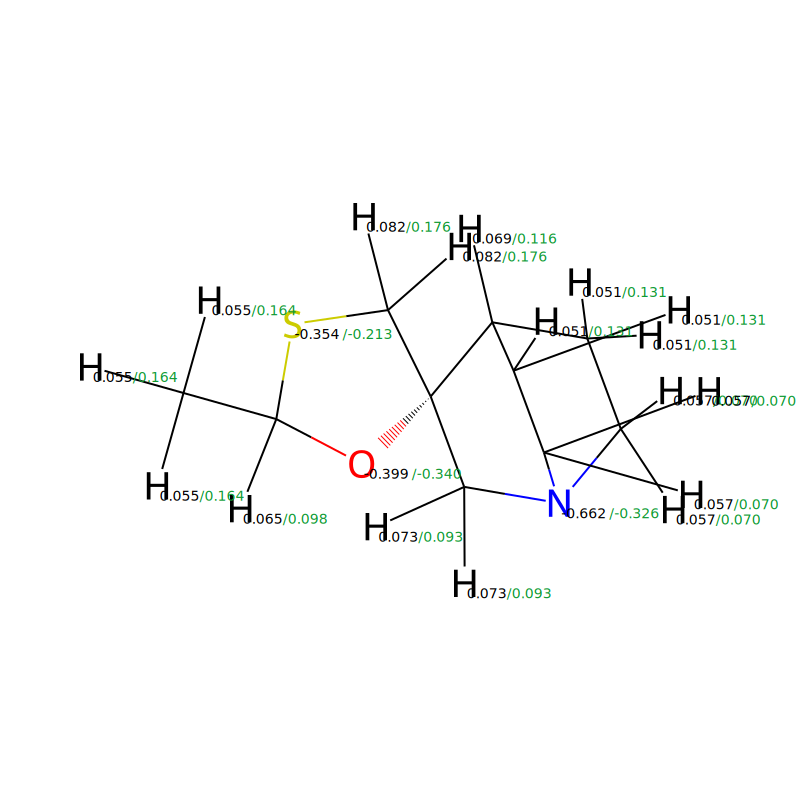

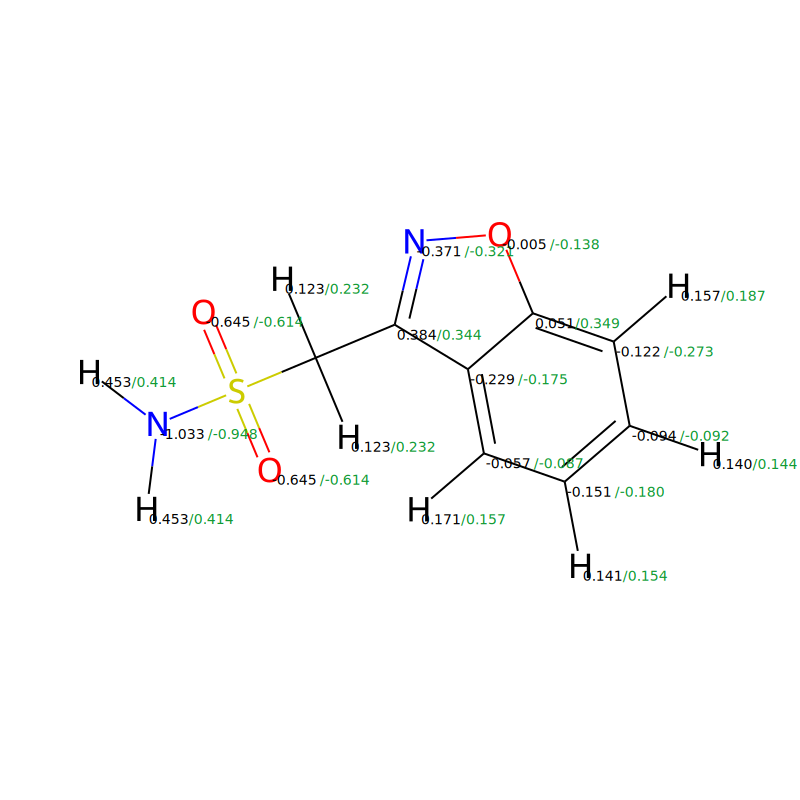

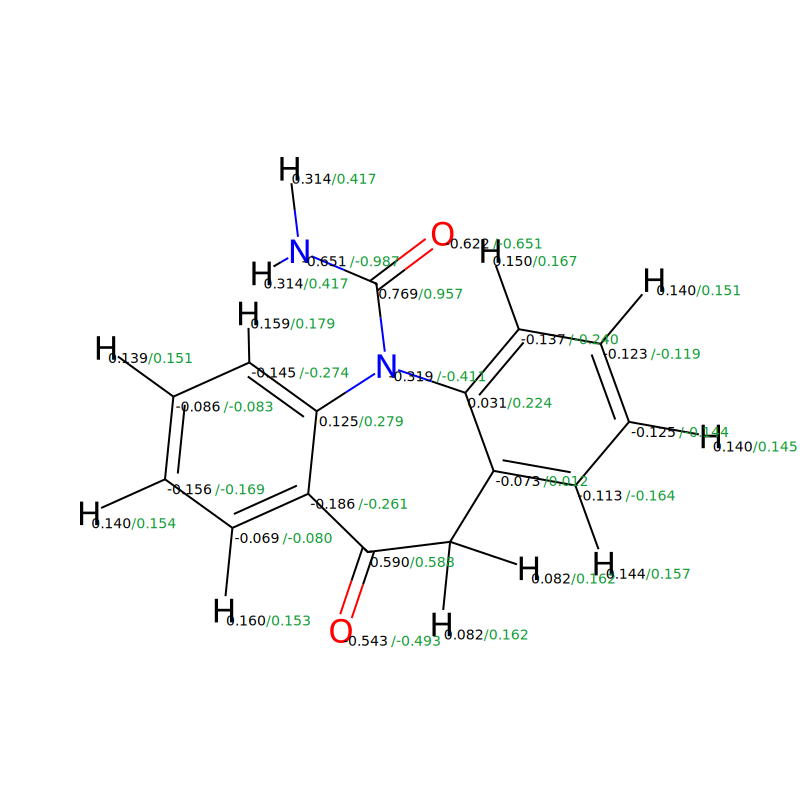

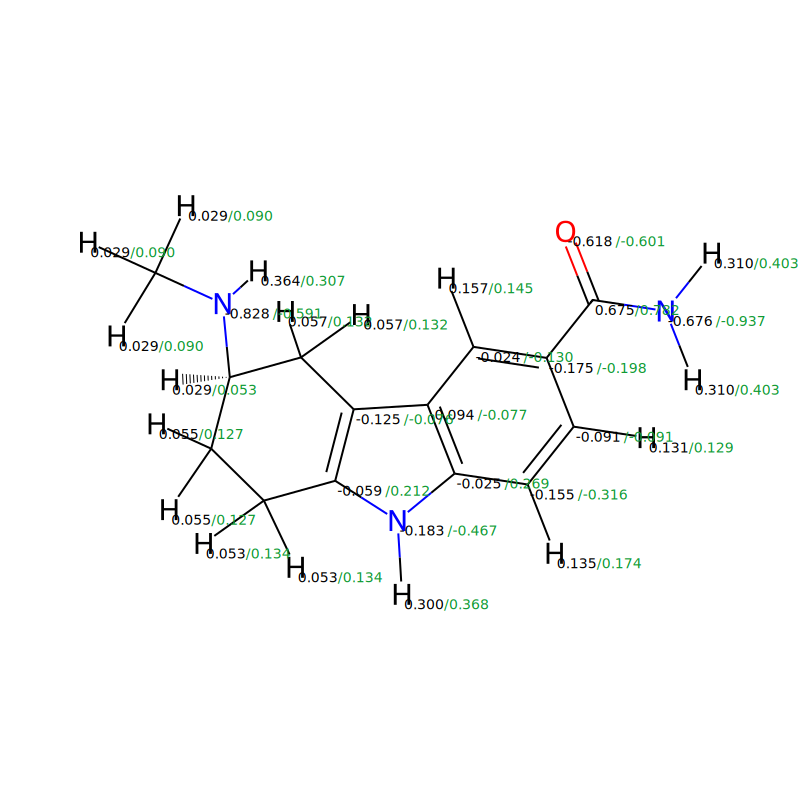

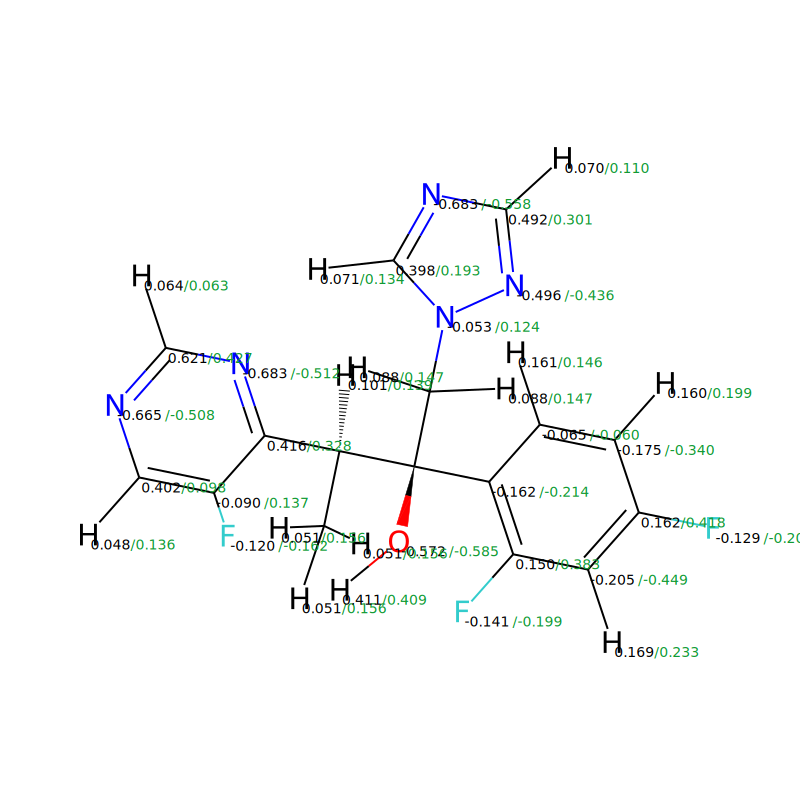

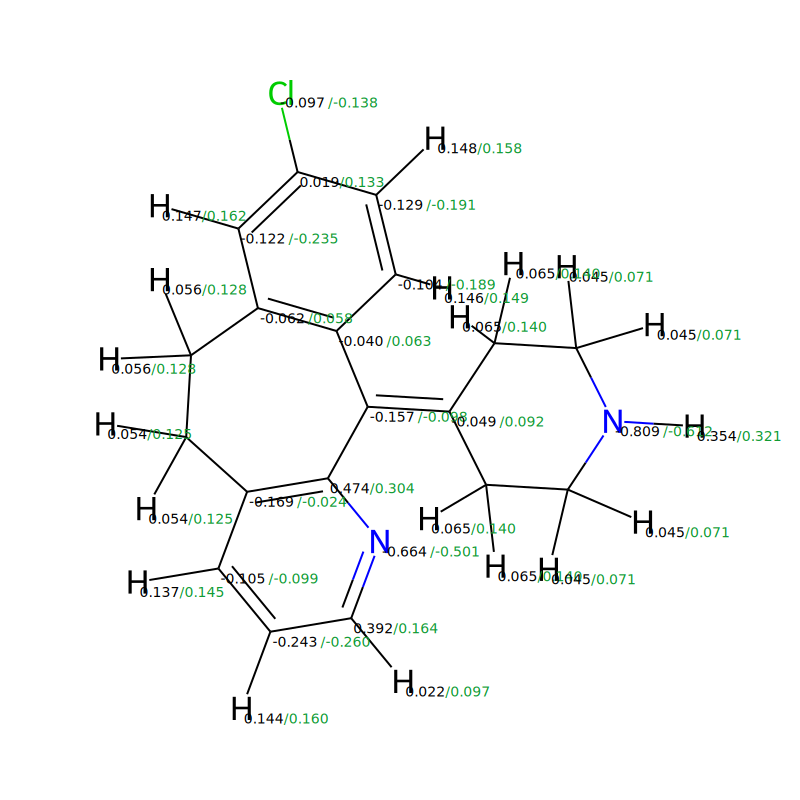

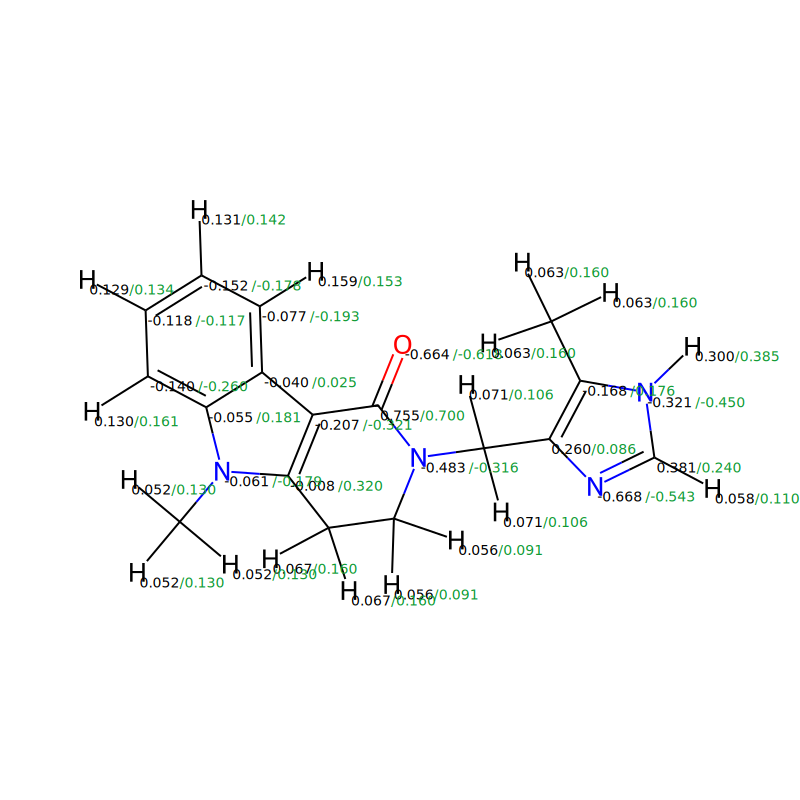

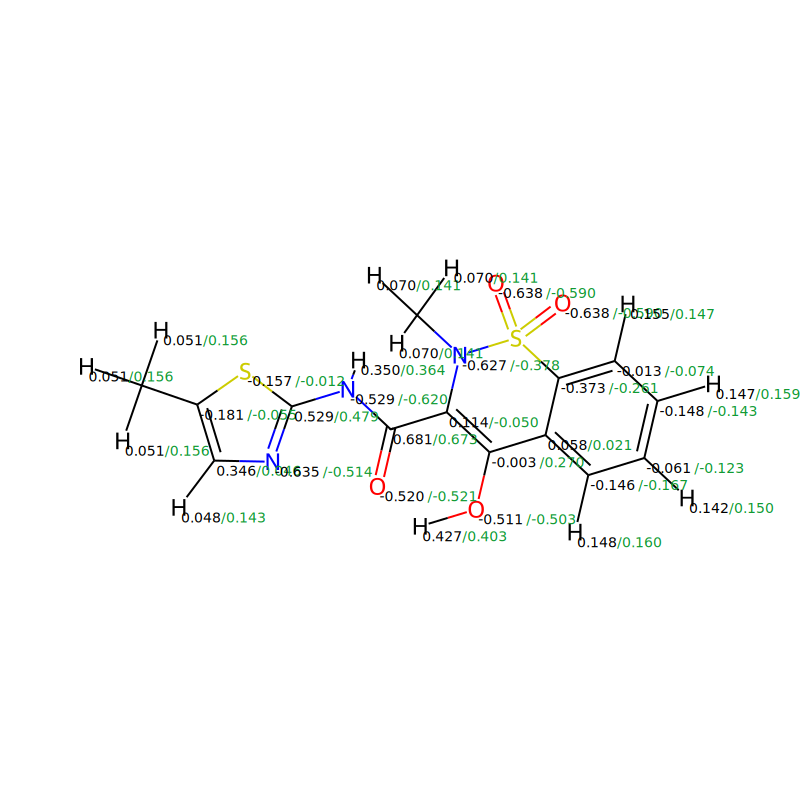

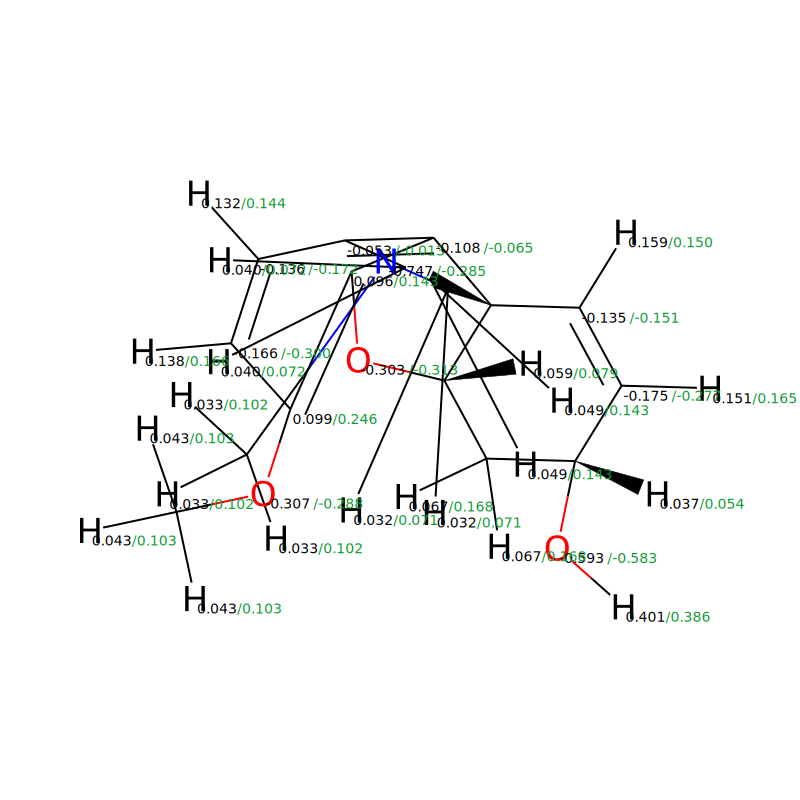

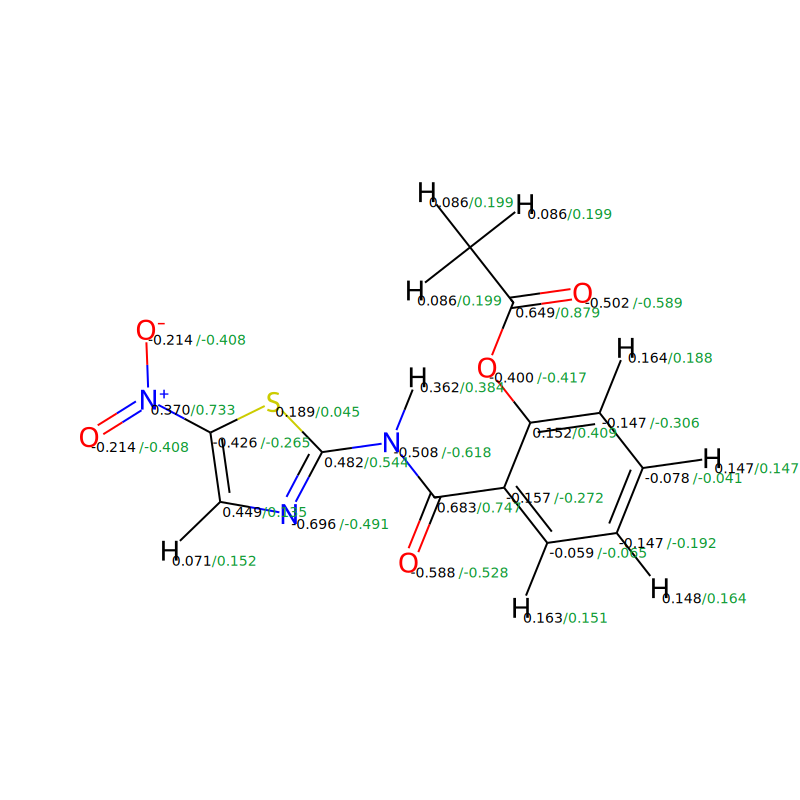

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
import svgutils.transform as sg
from IPython.display import SVG

def draw_mol_with_colored_labels(mol, charges_am1bcc, esp_model_charges, width=800, height=800):
    # Compute 2D coordinates for the molecule
    AllChem.Compute2DCoords(mol)


    
    # Create an SVG drawer
    drawer = rdMolDraw2D.MolDraw2DSVG(width, height)
    # (Optionally, adjust draw options as needed.)
    opts = drawer.drawOptions()
    opts.addAtomIndices = False  # we’ll add our own labels
    opts.padding = 0.1 
    
    # Draw the molecule without any atom notes
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # Remove any namespace prefixes that might interfere with parsing
    svg = svg.replace('svg:', '')
    
    # Parse the SVG with svgutils
    fig = sg.fromstring(svg)
    
    # Now, for each atom we want to label, add two text elements:
    # one for the AM1-BCC charge (in black) and one for the ESP charge (in blue).
    # (In this example we skip atoms with degree > 3 as in your original code.)
    for i, atom in enumerate(mol.GetAtoms()):
        if atom.GetTotalDegree() > 3:
            continue

        # Try to get the drawing coordinates for this atom.
        try:
            x, y = drawer.GetDrawCoords(i)
        except Exception as e:
            # If GetDrawCoords is not available, you’d have to calculate the mapping
            continue
        
        # Build the two label parts
        am1bcc_str = '%.3f' % charges_am1bcc[i]
        esp_str    = '/%.3f' % esp_model_charges[i]
        
        # Optionally, adjust the (x, y) position so the text doesn’t overlap the atom
        # (Here we assume the coordinates from GetDrawCoords are in the SVG coordinate space.)
        text_x = x+2
        text_y = y+15  # You might add an offset here (e.g., text_y - 5)
        
        # Create a text element for the AM1-BCC charge (black)
        label_am1bcc = sg.TextElement(text_x, text_y, am1bcc_str,
                                      size=14, font='sans-serif', anchor='start', color='black')
        
        # Estimate an offset for the second part.
        # (A rough approximation is to use the length of the first string times an average character width.)
        offset = len(am1bcc_str) * 8  # adjust 8 to suit your drawing/font
        label_esp = sg.TextElement(text_x + offset, text_y, esp_str,
                                   size=14, font='sans-serif', anchor='start', color='#119933')
        
        # Append the custom text elements to the SVG
        fig.append(label_am1bcc)
        fig.append(label_esp)
    
    return fig.to_str()


for row in rows_to_analyse.iterrows():
    row = row[-1]
    tagged_smiles = row['molecule']
    openff = Molecule.from_mapped_smiles(tagged_smiles, allow_undefined_stereo=True)
    geometry = row['geometry'].reshape(-1,3) * unit.angstrom
    openff.add_conformer(geometry)
    rdkit_mol = openff.to_rdkit()
    str =  draw_mol_with_colored_labels(rdkit_mol, row['am1bcc_charges'], row['esp_model_charges'])
    display(SVG(str))
